# Jacob Pan, Jacobfp2, CHBE 494 HW 4


## Question 1

In [2]:
from random import randint
  
def craps(gamesTotal):
    currentWin = 0
                
    for i in range(gamesTotal):
        first = randint(1,6) + randint(1,6)
        if first == 7 or first == 11:
            win = 1 
        elif first == 2 or first == 3 or first == 12:
            win = 0
        else:
            while True:
                new = randint(1,6) + randint(1,6)
                if new == first:
                    win = 1       
                    break
                if new == 7:
                    win = 0
                    break
                    
        if win == 1:
            currentWin = currentWin + 1
    percentage = currentWin / gamesTotal
    return percentage
print(craps(100000))
    


0.49261


## Question 2

In [3]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root

#Part A
def funcA(x):
    return np.sqrt(x/(x+1))*np.sin(x)**4

def integralA(y):
    a, _ = quad(funcA, 0 , y) 
    return a - 5
sol = root(integralA, 1)

print(sol.x[0])
print(sol.success)

#Part B
def funcB(x, a):
    return (x / (x**3 + np.exp(a*x)))**2.8

def integralB(z):
    a, _ = quad(funcB, 0 , 1, args = (z,))
    return a - np.pi

sol = root(integralB, -1)
print(sol.x[0])
print(sol.success)

14.367959581683794
True
-4.360927913967872
True


## Question 3

The boiling point of water is 373.14K
The boiling point of ammonia is 239.66K


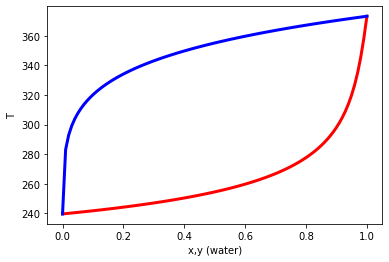

In [14]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

P = 1.01
water = [5.11564, 1687.537, -42.98]
ammonia = [4.48540, 926.132, -32.98]

def antione(chemical_1, param1, chemical_2, param2):  
    chemical1 = lambda T: P - 10**(param1[0] - param1[1] / (param1[2] + T))
    chemical2 = lambda T: P - 10**(param2[0] - param2[1] / (param2[2] + T))
    sol1 = root(chemical1,300)
    sol2 = root(chemical2,300)
    print("The boiling point of water is %.2fK" % sol1.x[0])
    print("The boiling point of ammonia is %.2fK" % sol2.x[0]) 
    
    x = np.linspace(0,1,100)
    y = np.linspace(0,1,100)
    Tx = np.zeros(100)
    Ty = np.zeros(100)

    #Bubble Point plot
    for i in range(100):
        solRauolt = root(lambda T: x[i] * 10**(param1[0] - param1[1] / (param1[2] + T)) + (1-x[i]) * 10 ** (param2[0] - param2[1] / (param2[2] + T)) - P, 350)
        Tx[i] = solRauolt.x[0]
    plt.plot(x, Tx, color = 'r', lw = 3)
    plt.xlabel("x,y (water)")
    plt.ylabel("T")
    #Dew point plot
    for i in range(100):
        solDew = root(lambda T: y[i] * P/ 10**(param1[0] - param1[1] / (param1[2] + T)) + (1-y[i])* P/ 10 ** (param2[0] - param2[1] / (param2[2] + T)) - 1, 250)
        Ty[i] = solDew.x[0]
    plt.plot(x, Ty, color = 'b', lw = 3)
    return None

antione("water",water,"ammonia",ammonia)

    
        

## Question 4

In [10]:

c1 = 2
T1 = 298
p = 1000
Cp = 4.0
k0 = 0.01
E = 1000
deltaH = -3E4



def cstr(z, tau):
    T, c = z
    eqn1 =  ((1/tau)*(c1-c)) - (k0*np.exp(E/T))*c
    eqn2 =  ((1/tau)*(T1-T)) - ((deltaH/(p*Cp)) * k0* np.exp(E/T) *c)
    return [eqn1, eqn2]

tauArray = np.logspace(0, 4, 999)
tempArray = np.zeros(999)
conversion = []
guess1 = 300
guess2 = 2

for i in range (999):
    sol1 = root(lambda z: cstr(z, tauArray[i]), [guess1, guess2])
    array1[i] = sol1.x[0]
    array2[i] = sol1.x[1]
    conversion.append((c1 - sol1.x[1])/c1) 
    guess1 = sol1.x[0]
    guess2 = sol2.x[1]
    
y = conversion

plt.plot(tauArray, conversion, color = 'r', lw = 3)
plt.xscale('log')
plt.xlabel("tau")
plt.ylabel("conversion")
plt.grid(color = 'grey', linestyle = '-', linewidth = 1)
plt.show()

plt.plot(tauArray, array1, color = 'r', lw = 3)
plt.xscale('log')
plt.xlabel("tau")
plt.ylabel("Temperature")
plt.grid(color = 'grey', linestyle = '-', linewidth = 1)
plt.show()

IndexError: list assignment index out of range